### * **What is a phishing attack?**
* Phishing is a type of social engineering attack often used to steal user data, including login credentials and credit card numbers. It occurs when an attacker, masquerading as a trusted entity, dupes a victim into opening an email, instant message, or text message. 

### * Phishing attack examples
* A spoofed email ostensibly from myuniversity.edu is mass-distributed to as many faculty members as possible. The email claims that the user’s password is about to expire. Instructions are given to go to myuniversity.edu/renewal to renew their password within 24 hours.>
<img src='https://github.com/taruntiwarihp/raw_images/blob/master/phishing-attack-email-example.png?raw=true'>

* Several things can occur by clicking the link. For example:

    1. The user is redirected to myuniversity.edurenewal.com, a bogus page appearing exactly like the real renewal page, where both new and existing passwords are requested. The attacker, monitoring the page, hijacks the original password to gain access to secured areas on the university network.
    
    2. The user is sent to the actual password renewal page. However, while being redirected, a malicious script activates in the background to hijack the user’s session cookie. This results in a reflected XSS attack, giving the perpetrator privileged access to the university network.

In [1]:
pip install pandas numpy seaborn matplotlib scikit-learn nltk pillow beautifulsoup4 selenium networkx

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


##### * Importing some useful libraries

In [2]:
import pandas as pd # use for data manipulation and analysis
import numpy as np # use for multi-dimensional array and matrix

import seaborn as sns # use for high-level interface for drawing attractive and informative statistical graphics 
import matplotlib.pyplot as plt # It provides an object-oriented API for embedding plots into applications
%matplotlib inline 
# It sets the backend of matplotlib to the 'inline' backend:
import time # calculate time 

from sklearn.linear_model import LogisticRegression # algo use to predict good or bad
from sklearn.naive_bayes import MultinomialNB # nlp algo use to predict good or bad

from sklearn.model_selection import train_test_split # spliting the data between feature and target
from sklearn.metrics import classification_report # gives whole report about metrics (e.g, recall,precision,f1_score,c_m)
from sklearn.metrics import confusion_matrix # gives info about actual and predict
from nltk.tokenize import RegexpTokenizer # regexp tokenizers use to split words from text  
from nltk.stem.snowball import SnowballStemmer # stemmes words
from sklearn.feature_extraction.text import CountVectorizer # create sparse matrix of words using regexptokenizes  
from sklearn.pipeline import make_pipeline # use for combining all prerocessors techniuqes and algos

from PIL import Image # getting images in notebook
# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator# creates words colud

from bs4 import BeautifulSoup # use for scraping the data from website
from selenium import webdriver # use for automation chrome 
import networkx as nx # for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

import pickle# use to dump model 

import warnings # ignores pink warnings 
warnings.filterwarnings('ignore')

* **Did some surfing and found some websites offering malicious links.** And found some datasets

* **Concatenate All datasets in one.**

* **Loading the main dataset.**

In [3]:
phish_data = pd.read_csv('Updated_URL_Dataset.csv')

#### * You can download dataset from my **Kaggle** Profile <a href='https://www.kaggle.com/taruntiwarihp/phishing-site-urls'>here</a>

In [4]:
phish_data.head()

,URL,Label
0,https://www.google.com,good
1,https://www.youtube.com,good
2,https://www.facebook.com,good
3,https://www.baidu.com,good
4,https://www.wikipedia.org,good


In [5]:
phish_data.tail()

,URL,Label
450171,http://ecct-it.com/docmmmnn/aptgd/index.php,bad
450172,http://faboleena.com/js/infortis/jquery/plugin...,bad
450173,http://faboleena.com/js/infortis/jquery/plugin...,bad
450174,http://atualizapj.com/,bad
450175,http://writeassociate.com/test/Portal/inicio/I...,bad


In [6]:
phish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450176 entries, 0 to 450175
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     450176 non-null  object
 1   Label   450176 non-null  object
dtypes: object(2)
memory usage: 6.9+ MB


* **About dataset**
* Data is containg 549,346 unique entries.
* There are two columns.
* Label column is prediction col which has 2 categories 
    A. Good - which means the urls is not containing malicious stuff and **this site is not a Phishing Site.**
    B. Bad - which means the urls contains malicious stuffs and **this site isa Phishing Site.**
* There is no missing value in the dataset.

In [7]:
phish_data.isnull().sum() # there is no missing values

URL      0
Label    0
dtype: int64

* **Since it is classification problems so let's see the classes are balanced or imbalances**

In [8]:
#create a dataframe of classes counts
label_counts = pd.DataFrame(phish_data.Label.value_counts())

In [9]:
print(label_counts.columns)

Index(['count'], dtype='object')


<Axes: xlabel='Label', ylabel='count'>

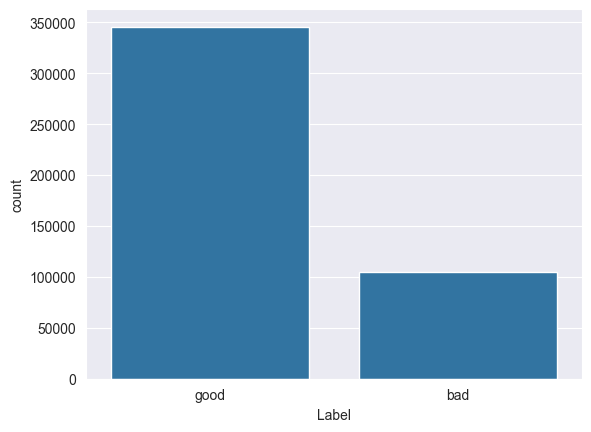

In [10]:
sns.set_style('darkgrid')
sns.barplot(x=label_counts.index, y=label_counts['count'])

### Preprocessing

* **Now that we have the data, we have to vectorize our URLs. I used CountVectorizer and gather words using tokenizer, since there are words in urls that are more important than other words e.g ‘virus’, ‘.exe’ ,’.dat’ etc. Lets convert the URLs into a vector form.**

#### RegexpTokenizer
* A tokenizer that splits a string using a regular expression, which matches either the tokens or the separators between tokens.

In [11]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [12]:
phish_data.URL[0]

'https://www.google.com'

In [13]:
# this will be pull letter which matches to expression
tokenizer.tokenize(phish_data.URL[0]) # using first row

['https', 'www', 'google', 'com']

In [14]:
print('Getting words tokenized ...')
t0= time.perf_counter()
phish_data['text_tokenized'] = phish_data.URL.map(lambda t: tokenizer.tokenize(t)) # doing with all rows
t1 = time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words tokenized ...
Time taken 1.610974700000952 sec


In [15]:
phish_data.sample(5)

,URL,Label,text_tokenized
436142,http://www.alsultanah.com/login.jsp.htm?email=...,bad,"[http, www, alsultanah, com, login, jsp, htm, ..."
353508,http://b.nevadaprivateoffice.com:8085/phpmyadm...,bad,"[http, b, nevadaprivateoffice, com, phpmyadm, ..."
377189,http://officinatonazzo.it/files/bartosnc2009_F...,bad,"[http, officinatonazzo, it, files, bartosnc, F..."
43748,https://www.etd.lib.nsysu.edu.tw/ETD-db/ETD-br...,good,"[https, www, etd, lib, nsysu, edu, tw, ETD, db..."
192055,https://www.facebook.com/william.beckley1,good,"[https, www, facebook, com, william, beckley]"


#### SnowballStemmer
* Snowball is a small string processing language, gives root words

In [16]:
stemmer = SnowballStemmer("english") # choose a language

In [17]:
print('Getting words stemmed ...')
t0= time.perf_counter()
phish_data['text_stemmed'] = phish_data['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words stemmed ...
Time taken 18.004592000012053 sec


In [18]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed
228530,https://www.lagalaxy.com/news/2011/06/take-it-...,good,"[https, www, lagalaxy, com, news, take, it, th...","[https, www, lagalaxi, com, news, take, it, th..."
277024,https://www.publicrecords.com/people-search-re...,good,"[https, www, publicrecords, com, people, searc...","[https, www, publicrecord, com, peopl, search,..."
341184,https://www.zip2tax.com/,good,"[https, www, zip, tax, com]","[https, www, zip, tax, com]"
65457,https://www.law.justia.com/cases/federal/appel...,good,"[https, www, law, justia, com, cases, federal,...","[https, www, law, justia, com, case, feder, ap..."
218655,https://www.imdb.com/title/tt0066448/,good,"[https, www, imdb, com, title, tt]","[https, www, imdb, com, titl, tt]"


In [19]:
print('Getting joiningwords ...')
t0= time.perf_counter()
phish_data['text_sent'] = phish_data['text_stemmed'].map(lambda l: ' '.join(l))
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting joiningwords ...
Time taken 0.16354379999393132 sec


In [20]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed,text_sent
214691,https://www.hunkymalestars.com/Profile_425.html,good,"[https, www, hunkymalestars, com, Profile, html]","[https, www, hunkymalestar, com, profil, html]",https www hunkymalestar com profil html
58801,https://www.in.linkedin.com/pub/isaac-tigrett/...,good,"[https, www, in, linkedin, com, pub, isaac, ti...","[https, www, in, linkedin, com, pub, isaac, ti...",https www in linkedin com pub isaac tigrett b
88027,https://www.pipl.com/directory/people/Bernice/...,good,"[https, www, pipl, com, directory, people, Ber...","[https, www, pipl, com, directori, peopl, bern...",https www pipl com directori peopl bernic aber...
389774,http://mirphak-nichteingeweihte.southwestadver...,bad,"[http, mirphak, nichteingeweihte, southwestadv...","[http, mirphak, nichteingeweiht, southwestadve...",http mirphak nichteingeweiht southwestadvertis...
44876,https://www.fallingskies.wikia.com/wiki/Seyche...,good,"[https, www, fallingskies, wikia, com, wiki, S...","[https, www, fallingski, wikia, com, wiki, sey...",https www fallingski wikia com wiki seychell g...


### Visualization 
**1. Visualize some important keys using word cloud**

In [21]:
#sliceing classes
bad_sites = phish_data[phish_data.Label == 'bad']
good_sites = phish_data[phish_data.Label == 'good']

In [22]:
bad_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
345738,http://atualizacaodedados.online,bad,"[http, atualizacaodedados, online]","[http, atualizacaodedado, onlin]",http atualizacaodedado onlin
345739,http://webmasteradmin.ukit.me/,bad,"[http, webmasteradmin, ukit, me]","[http, webmasteradmin, ukit, me]",http webmasteradmin ukit me
345740,http://stcdxmt.bigperl.in/klxtv/apps/uk/,bad,"[http, stcdxmt, bigperl, in, klxtv, apps, uk]","[http, stcdxmt, bigperl, in, klxtv, app, uk]",http stcdxmt bigperl in klxtv app uk
345741,https://tubuh-syarikat.com/plugins/fields/files/,bad,"[https, tubuh, syarikat, com, plugins, fields,...","[https, tubuh, syarikat, com, plugin, field, f...",https tubuh syarikat com plugin field file
345742,http://rolyborgesmd.com/exceword/excel.php?.ra...,bad,"[http, rolyborgesmd, com, exceword, excel, php...","[http, rolyborgesmd, com, exceword, excel, php...",http rolyborgesmd com exceword excel php rand ...


In [23]:
good_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
0,https://www.google.com,good,"[https, www, google, com]","[https, www, googl, com]",https www googl com
1,https://www.youtube.com,good,"[https, www, youtube, com]","[https, www, youtub, com]",https www youtub com
2,https://www.facebook.com,good,"[https, www, facebook, com]","[https, www, facebook, com]",https www facebook com
3,https://www.baidu.com,good,"[https, www, baidu, com]","[https, www, baidu, com]",https www baidu com
4,https://www.wikipedia.org,good,"[https, www, wikipedia, org]","[https, www, wikipedia, org]",https www wikipedia org


* create a function to visualize the important keys from url 

In [24]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def plot_wordcloud(text, mask=None, max_words=400, max_font_size=120, figure_size=(24.0, 16.0), 
                   title=None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'com', 'http'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                          stopwords=stopwords,
                          max_words=max_words,
                          max_font_size=max_font_size, 
                          random_state=42,
                          mask=mask)
    wordcloud.generate(text)

    plt.figure(figsize=figure_size)
    if image_color and mask is not None:
        image_colors = ImageColorGenerator(mask)
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
        plt.title(title, fontdict={'size': title_size, 'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.title(title, fontdict={'size': title_size, 'color': 'green', 'verticalalignment': 'bottom'})
    plt.axis('off')
    plt.tight_layout()


In [26]:
# Ensure `text_sent` column exists
data = good_sites['text_sent']  # Adjust column name if needed
data.reset_index(drop=True, inplace=True)

# Combine all text into a single string
common_text = ' '.join(data.astype(str))


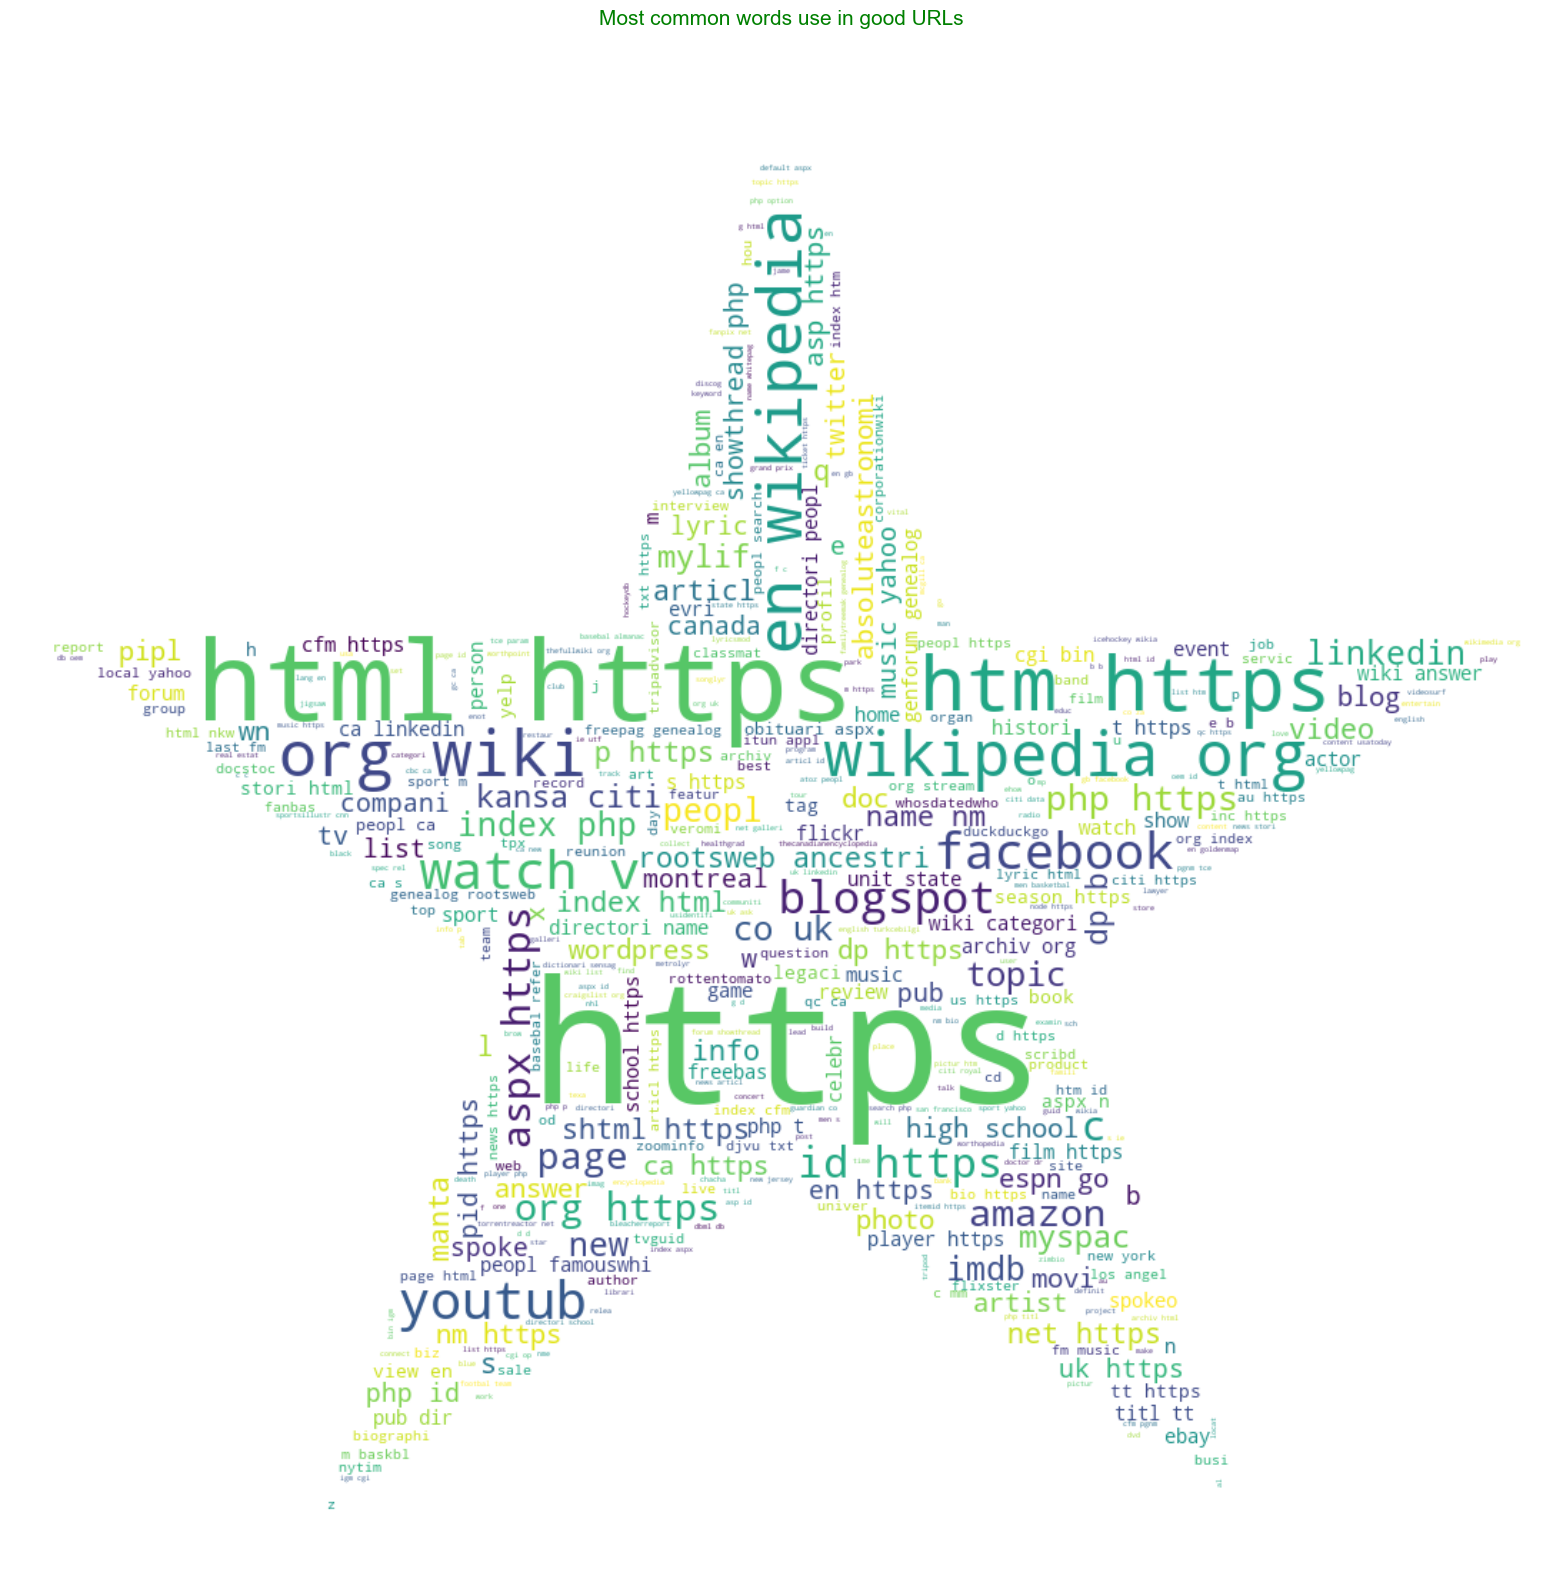

In [27]:
# Ensure mask file exists
common_mask = np.array(Image.open('star.png'))

# Plot the word cloud
plot_wordcloud(common_text, common_mask, max_words=400, max_font_size=120, 
               title='Most common words use in good URLs', title_size=15)


In [28]:
data = bad_sites.text_sent
data.reset_index(drop=True, inplace=True)

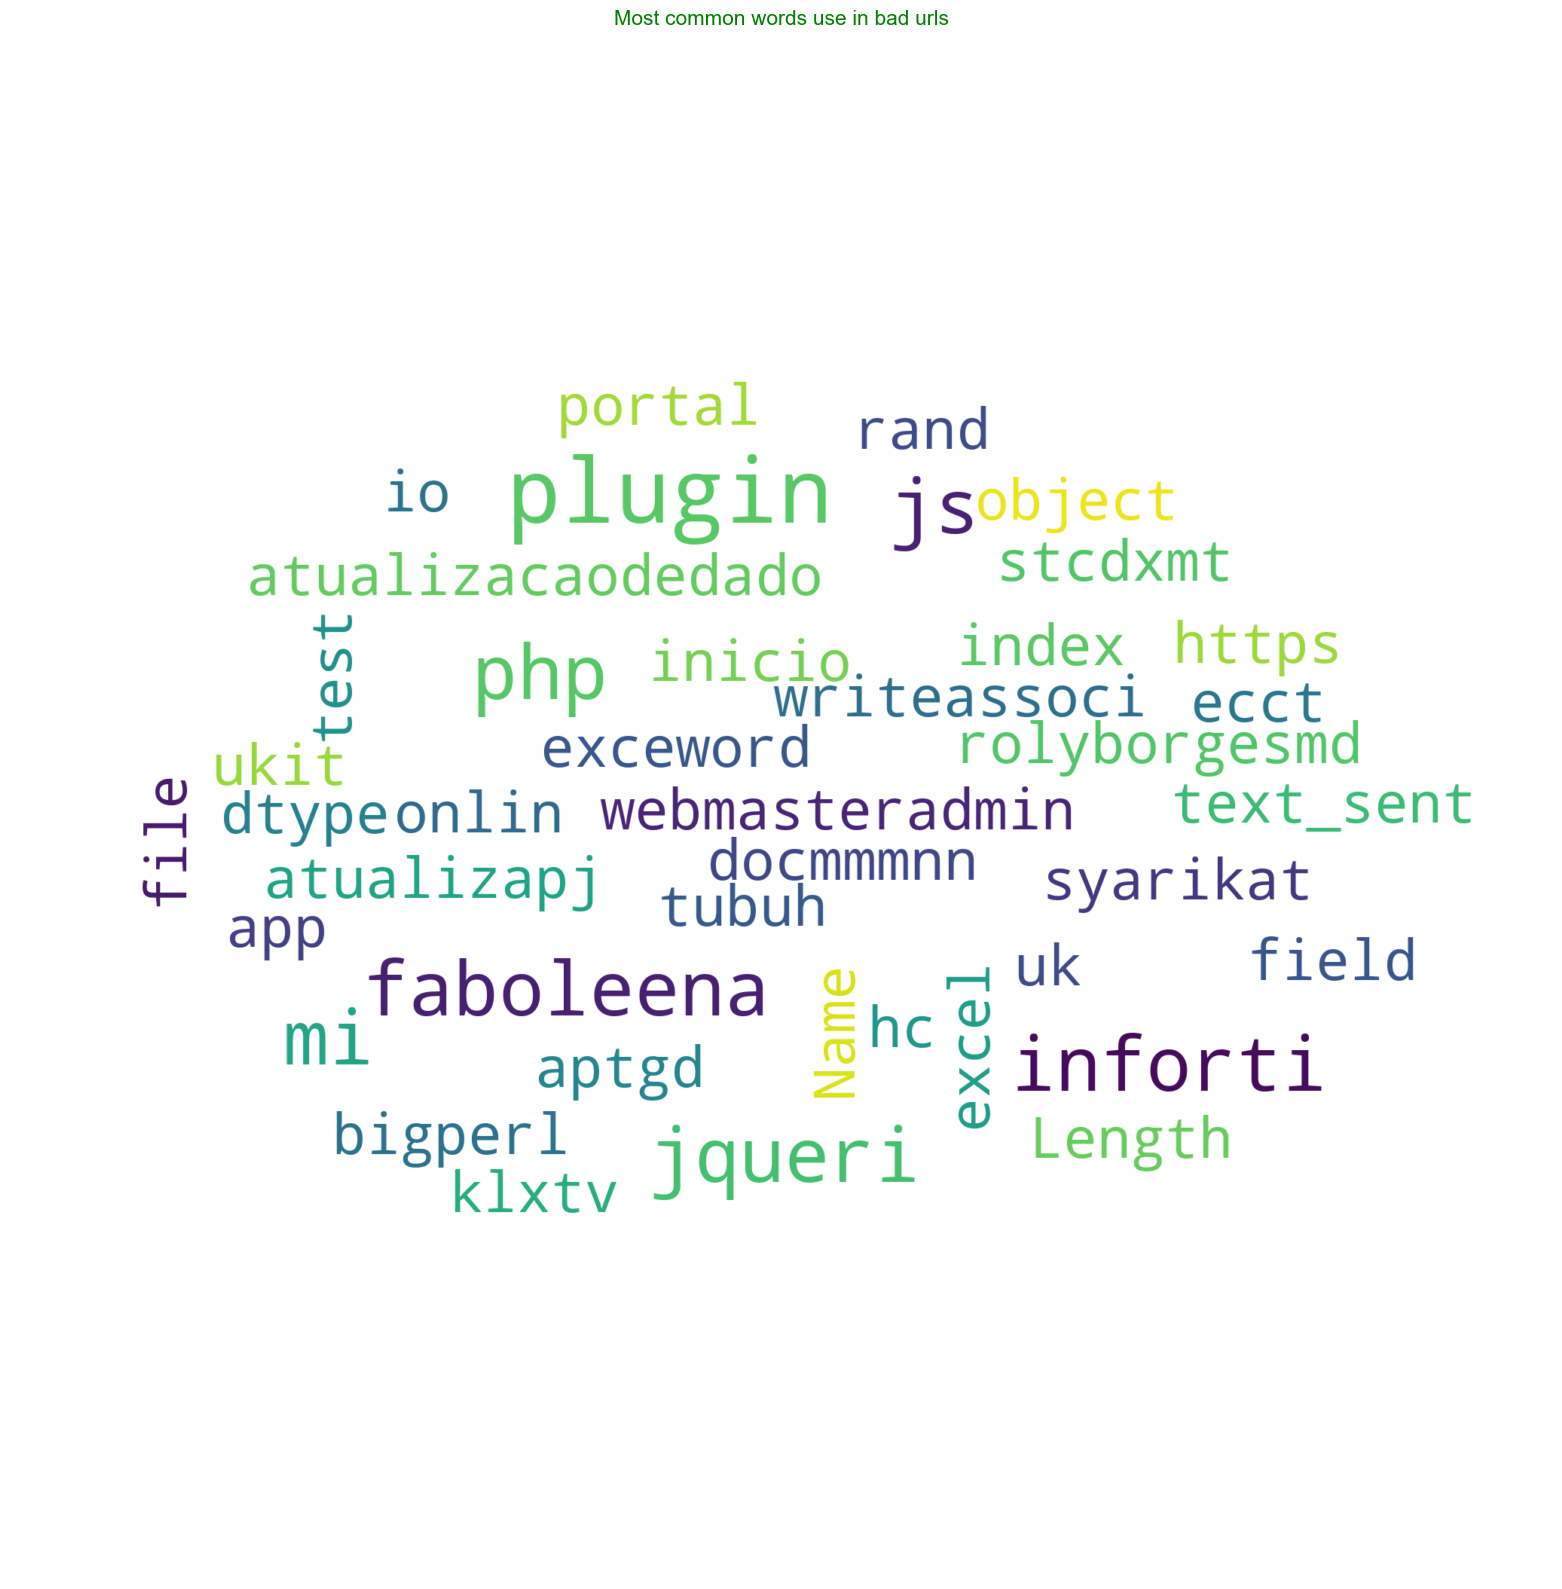

In [29]:
common_text = str(data)
common_mask = np.array(Image.open('comment.png'))
plot_wordcloud(common_text, common_mask, max_words=400, max_font_size=120, 
               title = 'Most common words use in bad urls', title_size=15)

#### Scrape any website
* First, setting up the Chrome webdriver so we can scrape dynamic web pages.

#### Chrome webdriver
* WebDriver tool use for automated testing of webapps across many browsers. It provides capabilities for navigating to web pages, user input and more

In [30]:
pip install webdriver-manager


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
from selenium import webdriver
from selenium.webdriver.edge.service import Service

# Initialize variables
browser = None  # Ensure `browser` is defined outside the `try` block

try:
    # Create a Service object and initialize the browser
    service = Service(r"C:\Users\Administrator\Desktop\comediver_1\edgedriver_win64\msedgedriver.exe")
    browser = webdriver.Edge(service=service)

    # Navigate to Google
    browser.get("https://www.google.com")
    print("Successfully opened Google!")

except Exception as e:
    # Catch and print any exceptions
    print(f"An error occurred: {e}")

# Note: No browser.quit() to keep the browser open as requested


Successfully opened Google!


In [32]:
list_urls = ['http://tonkeeper-app.com','https://tonkeeper-app.com/'] #here i take phishing sites 
links_with_text = []

* I took some phishing site to see were the hackers redirect(on different link) us.
* Use the BeautifulSoup library to extract only relevant hyperlinks for Google, i.e. links only with '<'a'>' tags with href attributes. 

#### BeautifulSoup
* It is use for getting data out of HTML, XML, and other markup languages. 

In [34]:
from bs4 import BeautifulSoup  # เพิ่มการ import BeautifulSoup

for url in list_urls:
    try:
        # เปิด URL
        browser.get(url)
        
        # สร้าง BeautifulSoup object จาก page source
        soup = BeautifulSoup(browser.page_source, "html.parser")
        
        # ดึงข้อมูลลิงก์ทั้งหมดจาก <a>
        for line in soup.find_all('a'):
            href = line.get('href')
            # ตรวจสอบลิงก์ว่าไม่ใช่ None ก่อนเก็บลงในลิสต์
            if href:
                links_with_text.append([url, href])
    except Exception as e:
        # จัดการข้อผิดพลาดสำหรับแต่ละ URL
        print(f"Error processing {url}: {e}")


Error processing http://tonkeeper-app.com: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: MicrosoftEdge=131.0.2903.99)
Stacktrace:
	(No symbol) [0x00007FF64F326B15]
	Microsoft::Applications::Events::EventProperty::empty [0x00007FF64F64F4B4+1437348]
	sqlite3_dbdata_init [0x00007FF64F6F2DE6+643174]
	(No symbol) [0x00007FF64F1E7657]
	(No symbol) [0x00007FF64F271CE5]
	(No symbol) [0x00007FF64F28670A]
	(No symbol) [0x00007FF64F26BE03]
	(No symbol) [0x00007FF64F242984]
	(No symbol) [0x00007FF64F241E30]
	(No symbol) [0x00007FF64F242571]
	Microsoft::Applications::Events::EventProperty::empty [0x00007FF64F5FBB44+1094964]
	(No symbol) [0x00007FF64F3632C8]
	Microsoft::Applications::Events::EventProperty::empty [0x00007FF64F5FAF83+1091955]
	Microsoft::Applications::Events::EventProperty::empty [0x00007FF64F5FAAE9+1090777]
	Microsoft::Applications::Events::ILogConfiguration::operator* [0x00007FF64F400CF1+461585]
	Microsoft::Applications

In [35]:
from selenium import webdriver
from selenium.webdriver.edge.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup

# Initialize variables
list_urls = [
    "https://www.wikipedia.org",  # ตัวอย่างเว็บไซต์ที่มั่นใจว่ามีข้อมูล
    "https://www.python.org",
    "http://eqofund.com",
    "https://intradayonline.com/"
]

links_with_text = []

# Path to EdgeDriver
service = Service(r"C:\Users\Administrator\Desktop\comediver_1\edgedriver_win64\msedgedriver.exe")

# Set up User-Agent for browser simulation
options = webdriver.EdgeOptions()
options.add_argument(
    "user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
)

# Initialize browser
browser = webdriver.Edge(service=service, options=options)

# Process URLs
for url in list_urls:
    try:
        print(f"Processing URL: {url}")
        browser.get(url)

        # Wait for the presence of <a> tags (max 10 seconds)
        try:
            WebDriverWait(browser, 10).until(
                EC.presence_of_element_located((By.TAG_NAME, "a"))
            )
        except Exception:
            print(f"No <a> tags found in {url}.")
            continue

        # Parse the HTML content with BeautifulSoup
        soup = BeautifulSoup(browser.page_source, "html.parser")
        links = soup.find_all('a')
        print(f"Found {len(links)} links in {url}")

        # Collect all links with href attributes
        for line in links:
            href = line.get('href')
            if href:
                links_with_text.append([url, href])

        # Check for iframe content
        iframes = soup.find_all('iframe')
        if iframes:
            print(f"Found {len(iframes)} iframe(s) in {url}. Checking iframe content...")
            for iframe in iframes:
                iframe_src = iframe.get('src')
                if iframe_src:
                    print(f"Found iframe source: {iframe_src}")

    except Exception as e:
        print(f"Error processing {url}: {e}")

# Close the browser
browser.quit()

# Print collected links
print("Collected links:", links_with_text)

# Save to DataFrame for analysis
import pandas as pd
df = pd.DataFrame(links_with_text, columns=["from", "to"])
print("DataFrame created:")
print(df.head())

# Save the links to CSV
df.to_csv("collected_links.csv", index=False)
print("Links saved to 'collected_links.csv'.")


Processing URL: https://www.wikipedia.org
Found 372 links in https://www.wikipedia.org
Processing URL: https://www.python.org
Found 212 links in https://www.python.org
Processing URL: http://eqofund.com
Found 41 links in http://eqofund.com
Processing URL: https://intradayonline.com/
Error processing https://intradayonline.com/: Message: unknown error: net::ERR_NAME_NOT_RESOLVED
  (Session info: MicrosoftEdge=131.0.2903.99)
Stacktrace:
	(No symbol) [0x00007FF64F326B15]
	Microsoft::Applications::Events::EventProperty::empty [0x00007FF64F64F4B4+1437348]
	sqlite3_dbdata_init [0x00007FF64F6F2DE6+643174]
	(No symbol) [0x00007FF64F202ED7]
	(No symbol) [0x00007FF64F1F76B7]
	(No symbol) [0x00007FF64F1F8CCD]
	(No symbol) [0x00007FF64F1F78BF]
	(No symbol) [0x00007FF64F1F72D3]
	(No symbol) [0x00007FF64F1F7278]
	(No symbol) [0x00007FF64F1F54BC]
	(No symbol) [0x00007FF64F1F591C]
	(No symbol) [0x00007FF64F207A4A]
	(No symbol) [0x00007FF64F28739E]
	(No symbol) [0x00007FF64F26C19A]
	(No symbol) [0x0000

In [36]:
print("Links with text:", links_with_text)

Links with text: [['https://www.wikipedia.org', '//en.wikipedia.org/'], ['https://www.wikipedia.org', '//ru.wikipedia.org/'], ['https://www.wikipedia.org', '//ja.wikipedia.org/'], ['https://www.wikipedia.org', '//de.wikipedia.org/'], ['https://www.wikipedia.org', '//fr.wikipedia.org/'], ['https://www.wikipedia.org', '//es.wikipedia.org/'], ['https://www.wikipedia.org', '//it.wikipedia.org/'], ['https://www.wikipedia.org', '//zh.wikipedia.org/'], ['https://www.wikipedia.org', '//fa.wikipedia.org/'], ['https://www.wikipedia.org', '//pt.wikipedia.org/'], ['https://www.wikipedia.org', '//ar.wikipedia.org/'], ['https://www.wikipedia.org', '//de.wikipedia.org/'], ['https://www.wikipedia.org', '//en.wikipedia.org/'], ['https://www.wikipedia.org', '//es.wikipedia.org/'], ['https://www.wikipedia.org', '//fa.wikipedia.org/'], ['https://www.wikipedia.org', '//fr.wikipedia.org/'], ['https://www.wikipedia.org', '//it.wikipedia.org/'], ['https://www.wikipedia.org', '//arz.wikipedia.org/'], ['https:/

#### Turn the URL’s into a Dataframe
* After you get the list of your websites with hyperlinks turn them into a Pandas DataFrame with columns “from” (URL where the link resides) and “to” (link destination URL)

In [37]:
import pandas as pd  # เพิ่มการ import pandas

# สร้าง DataFrame จาก links_with_text
df = pd.DataFrame(links_with_text, columns=["from", "to"])


In [38]:
df.head()

,from,to
0,https://www.wikipedia.org,//en.wikipedia.org/
1,https://www.wikipedia.org,//ru.wikipedia.org/
2,https://www.wikipedia.org,//ja.wikipedia.org/
3,https://www.wikipedia.org,//de.wikipedia.org/
4,https://www.wikipedia.org,//fr.wikipedia.org/


#### Step 3: Draw a graph
* Finally, use the aforementioned DataFrame to **visualize an internal link structure by feeding it to the Networkx method from_pandas_edgelist first** and draw it by calling nx.draw

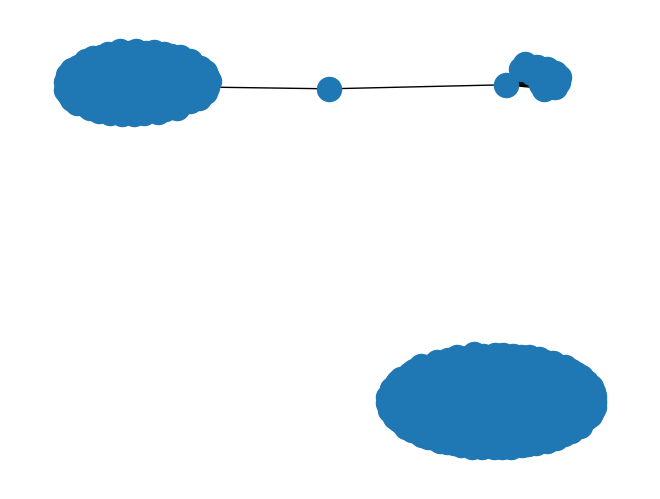

In [39]:
import networkx as nx  # เพิ่มการ import networkx

# สร้างกราฟจาก pandas DataFrame
GA = nx.from_pandas_edgelist(df, source="from", target="to")

# วาดกราฟ
nx.draw(GA, with_labels=False)


### Creating Model

#### CountVectorizer
* CountVectorizer is used to transform a corpora of text to a vector of term / token counts.

In [40]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# สร้าง CountVectorizer object
cv = CountVectorizer()

# ตัวอย่างการใช้งาน CountVectorizer
sample_text = ["This is a sample text", "This is another sample text"]
X = cv.fit_transform(sample_text)

# แสดงผลลัพธ์
print("Feature Names:", cv.get_feature_names_out())  # แสดงคำที่ถูกแปลง
print("Sparse Matrix:\n", X.toarray())  # แสดงผลลัพธ์ในรูปแบบ dense matrix


Feature Names: ['another' 'is' 'sample' 'text' 'this']
Sparse Matrix:
 [[0 1 1 1 1]
 [1 1 1 1 1]]


In [41]:
#help(CountVectorizer())

In [42]:
feature = cv.fit_transform(phish_data.text_sent) #transform all text which we tokenize and stemed

In [43]:
feature[:5].toarray() # convert sparse matrix into array to print transformed features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

#### * Spliting the data 

In [44]:
trainX, testX, trainY, testY = train_test_split(feature, phish_data.Label)

### LogisticRegression
* Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.

In [45]:
# create lr object
lr = LogisticRegression()

In [46]:
lr.fit(trainX,trainY)

LogisticRegression()

In [47]:
lr.score(testX,testY)

0.997547625817458

.*** Logistic Regression is giving 96% accuracy, Now we will store scores in dict to see which model perform best**

In [48]:
Scores_ml = {}
Scores_ml['Logistic Regression'] = np.round(lr.score(testX,testY),2)

Training Accuracy : 0.9977401431143967
Testing Accuracy : 0.997547625817458

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.99      1.00      0.99     26261
        Good       1.00      1.00      1.00     86283

    accuracy                           1.00    112544
   macro avg       1.00      1.00      1.00    112544
weighted avg       1.00      1.00      1.00    112544


CONFUSION MATRIX


<Axes: >

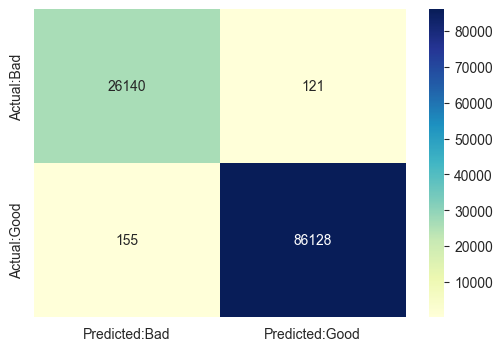

In [49]:
print('Training Accuracy :',lr.score(trainX,trainY))
print('Testing Accuracy :',lr.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(lr.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(lr.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

### MultinomialNB
* Applying Multinomial Naive Bayes to NLP Problems. Naive Bayes Classifier Algorithm is a family of probabilistic algorithms based on applying Bayes' theorem with the “naive” assumption of conditional independence between every pair of a feature.

In [50]:
# create mnb object
mnb = MultinomialNB()

In [51]:
mnb.fit(trainX,trainY)

MultinomialNB()

In [52]:
mnb.score(testX,testY)

0.9957616576627808

*** MultinomialNB gives us 95% accuracy**  

In [53]:
Scores_ml['MultinomialNB'] = np.round(mnb.score(testX,testY),2)

Training Accuracy : 0.996650199033267
Testing Accuracy : 0.9957616576627808

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.99      1.00      0.99     26056
        Good       1.00      1.00      1.00     86488

    accuracy                           1.00    112544
   macro avg       0.99      1.00      0.99    112544
weighted avg       1.00      1.00      1.00    112544


CONFUSION MATRIX


<Axes: >

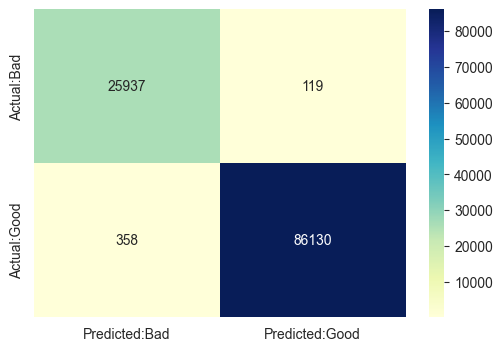

In [54]:
print('Training Accuracy :',mnb.score(trainX,trainY))
print('Testing Accuracy :',mnb.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(mnb.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(mnb.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

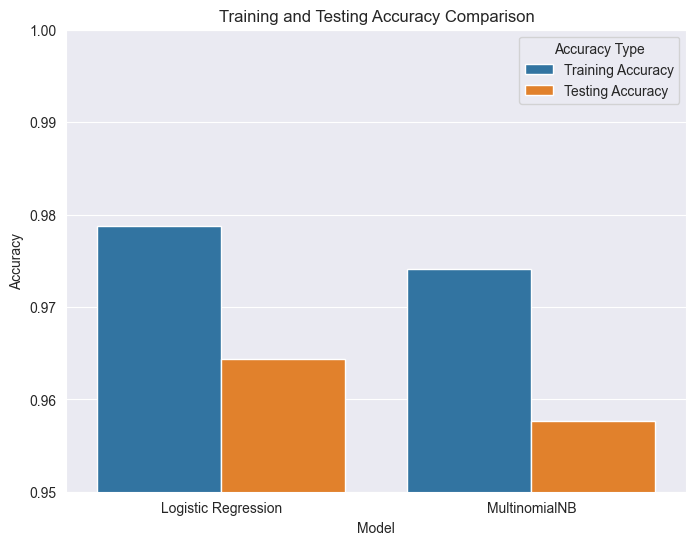

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ข้อมูลความแม่นยำ (Training และ Testing)
Scores_ml = {
    "Logistic Regression": {"Training Accuracy": 0.9787625998461199, "Testing Accuracy": 0.9643431850120506},
    "MultinomialNB": {"Training Accuracy": 0.9740636733663585, "Testing Accuracy": 0.9576443347386356}
}

# แปลงข้อมูลเป็น DataFrame
acc_df = pd.DataFrame(Scores_ml).T  # Transpose เพื่อให้ชื่อโมเดลอยู่ที่ index
acc_df = acc_df.reset_index().rename(columns={"index": "Model"})  # แก้ไข index เป็น column "Model"

# Melt DataFrame เพื่อให้อยู่ในรูปแบบที่ใช้กับ seaborn
acc_melted = acc_df.melt(id_vars="Model", var_name="Accuracy Type", value_name="Accuracy")

# วาดกราฟด้วย seaborn
sns.set_style('darkgrid')
plt.figure(figsize=(8, 6))
sns.barplot(x="Model", y="Accuracy", hue="Accuracy Type", data=acc_melted)

# เพิ่ม Labels และ Title
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Training and Testing Accuracy Comparison")
plt.ylim(0.95, 1.0)  # ปรับขอบเขตแกน y เพื่อเน้นความแตกต่าง

# แสดงกราฟ
plt.show()


*** So, Logistic Regression is the best fit model, Now we make sklearn pipeline using Logistic Regression**

In [57]:
pipeline_ls = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), LogisticRegression())
##(r'\b(?:http|ftp)s?://\S*\w|\w+|[^\w\s]+') ([a-zA-Z]+)([0-9]+) -- these tolenizers giving me low accuray 

In [58]:
trainX, testX, trainY, testY = train_test_split(phish_data.URL, phish_data.Label)

In [59]:
pipeline_ls.fit(trainX,trainY)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('logisticregression', LogisticRegression())])

In [60]:
pipeline_ls.score(testX,testY) 

0.9976986778504408

Training Accuracy : 0.9981399867311155
Testing Accuracy : 0.9976986778504408

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.99      1.00      1.00     25933
        Good       1.00      1.00      1.00     86611

    accuracy                           1.00    112544
   macro avg       1.00      1.00      1.00    112544
weighted avg       1.00      1.00      1.00    112544


CONFUSION MATRIX


<Axes: >

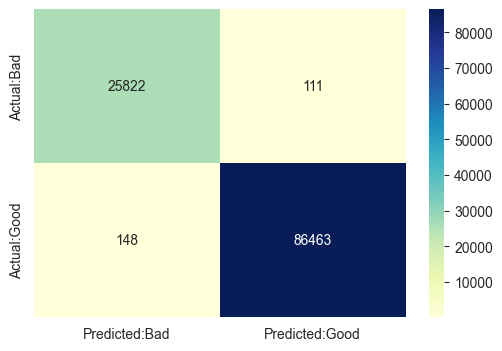

In [64]:
print('Training Accuracy :',pipeline_ls.score(trainX,trainY))
print('Testing Accuracy :',pipeline_ls.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(pipeline_ls.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(pipeline_ls.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [65]:
pickle.dump(pipeline_ls,open('phishing.pkl','wb'))

In [66]:
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
result = loaded_model.score(testX,testY)
print(result)

0.9976986778504408


***That’s it. See, it's that simple yet so effective. We get an accuracy of 98%. That’s a very high value for a machine to be able to detect a malicious URL with. Want to test some links to see if the model gives good predictions? Sure. Let's do it**

In [67]:
# Bad links => these are phishing sites
bad_links = [
    "yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php",
    "fazan-pacir.rs/temp/libraries/ipad",
    "www.tubemoviez.exe",
    "svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt"
]

# Good links => these are not phishing sites
good_links = [
    "www.youtube.com/",
    "youtube.com/watch?v=qI0TQJI3vdU",
    "www.retailhellunderground.com/",
    "restorevisioncenters.com/html/technology.html"
]


In [68]:
import pickle

predict_bad = [
    'yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php',
    'fazan-pacir.rs/temp/libraries/ipad',
    'tubemoviez.exe',
    'svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt'
]

predict_good = [
    'youtube.com/',
    'youtube.com/watch?v=qI0TQJI3vdU',
    'retailhellunderground.com/',
    'restorevisioncenters.com/html/technology.html'
]

# Load the phishing detection model
loaded_model = pickle.load(open('phishing.pkl', 'rb'))

# Predict results
result_bad = loaded_model.predict(predict_bad)
result_good = loaded_model.predict(predict_good)

# Print results
print("Bad Links Prediction:", result_bad)
print("*" * 30)
print("Good Links Prediction:", result_good)


Bad Links Prediction: ['bad' 'bad' 'bad' 'bad']
******************************
Good Links Prediction: ['good' 'good' 'bad' 'bad']


### Protections
#### How to Protect Your Computer 
Below are some key steps to protecting your computer from intrusion:

1. **Keep Your Firewall Turned On:** A firewall helps protect your computer from hackers who might try to gain access to crash it, delete information, or even steal passwords or other sensitive information. Software firewalls are widely recommended for single computers. The software is prepackaged on some operating systems or can be purchased for individual computers. For multiple networked computers, hardware routers typically provide firewall protection.

2. **Install or Update Your Antivirus Software:** Antivirus software is designed to prevent malicious software programs from embedding on your computer. If it detects malicious code, like a virus or a worm, it works to disarm or remove it. Viruses can infect computers without users’ knowledge. Most types of antivirus software can be set up to update automatically.

3. **Install or Update Your Antispyware Technology:** Spyware is just what it sounds like—software that is surreptitiously installed on your computer to let others peer into your activities on the computer. Some spyware collects information about you without your consent or produces unwanted pop-up ads on your web browser. Some operating systems offer free spyware protection, and inexpensive software is readily available for download on the Internet or at your local computer store. Be wary of ads on the Internet offering downloadable antispyware—in some cases these products may be fake and may actually contain spyware or other malicious code. It’s like buying groceries—shop where you trust.

4. **Keep Your Operating System Up to Date:** Computer operating systems are periodically updated to stay in tune with technology requirements and to fix security holes. Be sure to install the updates to ensure your computer has the latest protection.

5. **Be Careful What You Download:** Carelessly downloading e-mail attachments can circumvent even the most vigilant anti-virus software. Never open an e-mail attachment from someone you don’t know, and be wary of forwarded attachments from people you do know. They may have unwittingly advanced malicious code.

6. **Turn Off Your Computer:** With the growth of high-speed Internet connections, many opt to leave their computers on and ready for action. The downside is that being “always on” renders computers more susceptible. Beyond firewall protection, which is designed to fend off unwanted attacks, turning the computer off effectively severs an attacker’s connection—be it spyware or a botnet that employs your computer’s resources to reach out to other unwitting users.